<a href="https://colab.research.google.com/github/antonioalbanese/Time-Series-Anomaly-Detection-An-experimental-survey/blob/main/results_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd 

excel = pd.read_excel("ris.xlsx")
excel.columns = ['SEED', 'SEQ_LEN', 'DATASET', 'METHOD', 'THRESHOLD', 'True-f1',
       'weighted-f1', 'accuracy', 'true_recall', 'true_precision',
       'weighted_recall', 'weighted_precision', 'epoch_time']

In [64]:
means = excel[(excel['METHOD'] == "USAD") & (excel['DATASET']=="SWAT")].groupby(['SEQ_LEN','THRESHOLD']).mean()

In [76]:
means = pd.DataFrame(means).reset_index()

In [78]:
means

,SEQ_LEN,THRESHOLD,SEED,True-f1,weighted-f1,accuracy,true_recall,true_precision,weighted_recall,weighted_precision,epoch_time
0,30,0.3,3.0,0.648730,0.839018,0.821164,0.823707,0.631454,0.821164,0.930258,1.098927
1,30,0.4,3.0,0.742230,0.932835,0.931013,0.729957,0.818981,0.931013,0.944633,1.098927
2,30,0.5,3.0,0.795951,0.953299,0.956311,0.687608,0.955642,0.956311,0.957346,1.098927
3,30,0.6,3.0,0.799737,0.954886,0.958418,0.672306,0.988761,0.958418,0.959822,1.098927
4,30,0.7,3.0,0.795330,0.954117,0.957912,0.661638,0.997442,0.957912,0.959717,1.098927
5,30,0.8,3.0,0.789197,0.952855,0.956858,0.652694,0.998029,0.956858,0.958778,1.098927
6,30,0.9,3.0,0.473027,0.898966,0.924478,0.390841,0.599009,0.924478,0.882318,1.098927
7,50,0.3,3.0,0.679926,0.894850,0.881885,0.787722,0.680063,0.881885,0.932347,0.965824
8,50,0.4,3.0,0.794349,0.952285,0.955168,0.693060,0.939988,0.955168,0.955570,0.965824
9,50,0.5,3.0,0.793724,0.953296,0.957124,0.660854,0.994038,0.957124,0.958829,0.965824


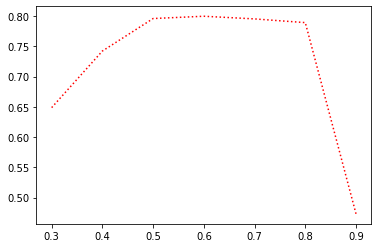

In [92]:
import matplotlib.pyplot as plt

plt.plot(means[means['SEQ_LEN']==30]['THRESHOLD'],means[means['SEQ_LEN']==30]['True-f1'], color="r", linestyle=":")

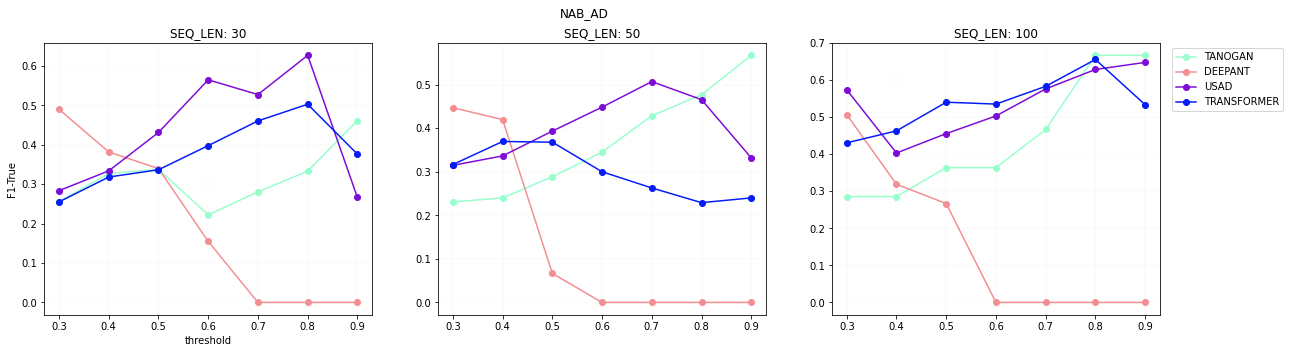

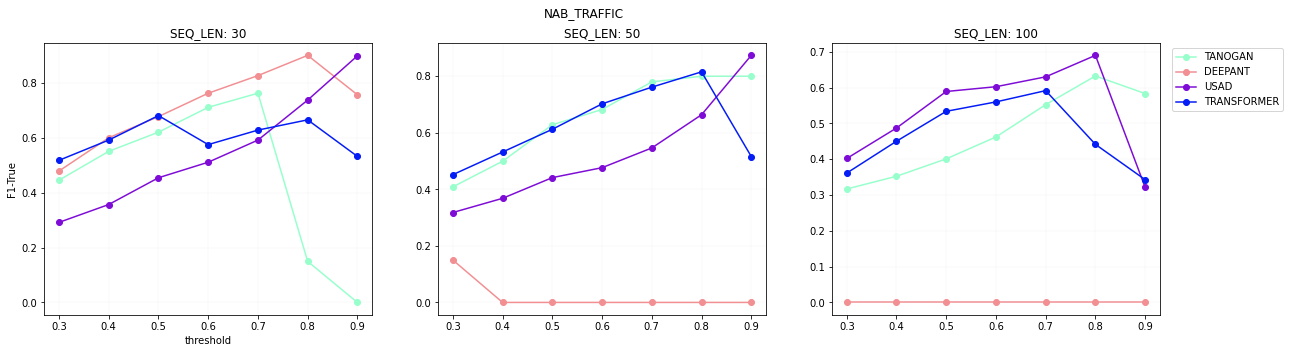

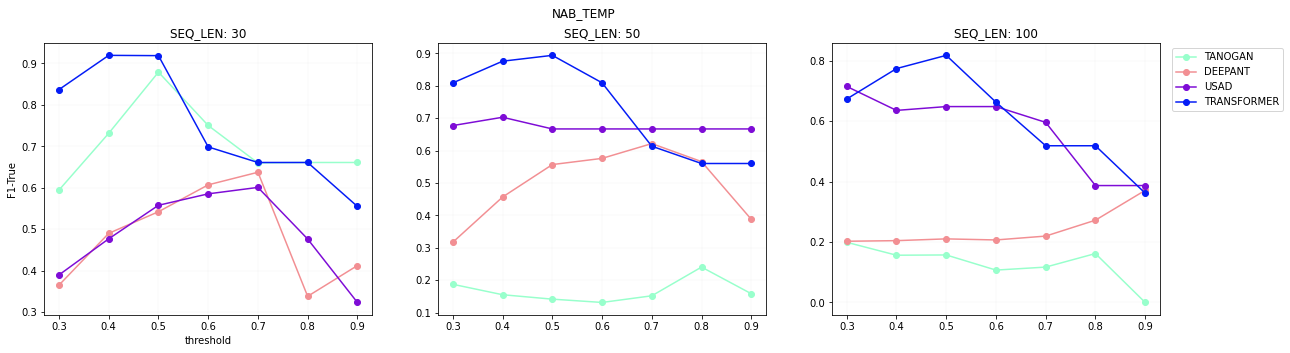

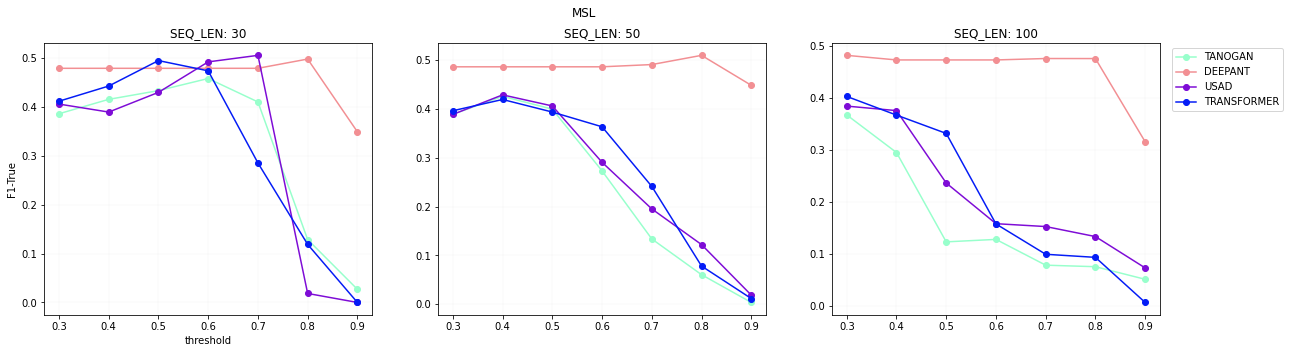

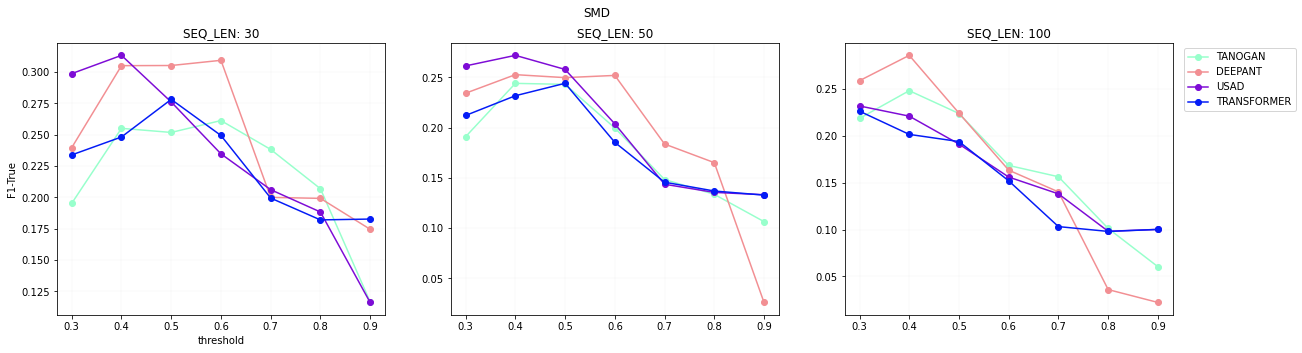

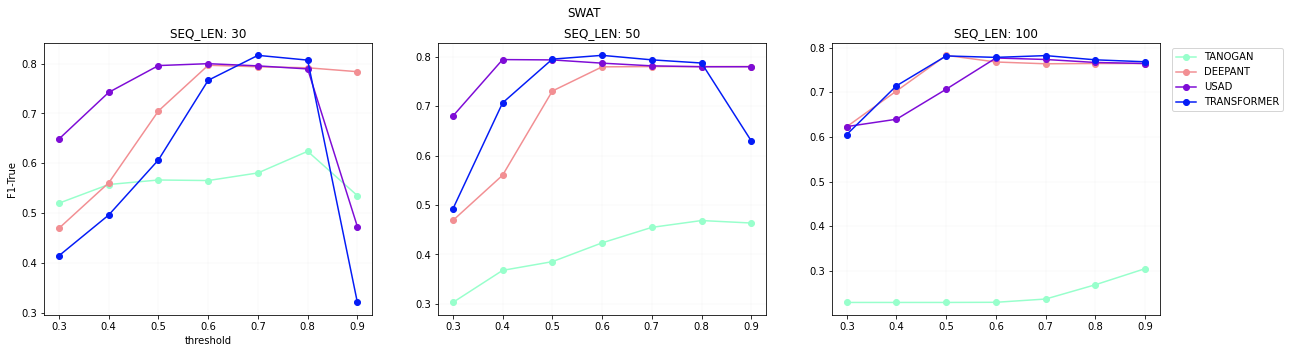

In [156]:
lengths = excel['SEQ_LEN'].unique()
methods = excel['METHOD'].unique()
datasets = excel['DATASET'].unique()
styles = ["-", "--", ":"]
colors = ["#98ffcc", "#f28f93", "#7e0cd6", "#041cf6", "#ffff31", "#424957"]

for d in datasets:
  fig, axs = plt.subplots(1, 3, figsize=(20,5))
  fig.suptitle(d)
  for i,m in enumerate(methods):
    means = excel[(excel['METHOD'] == m) & (excel['DATASET']==d)].groupby(['SEQ_LEN','THRESHOLD']).mean().reset_index()
    for j,l in enumerate(lengths):
      axs[j].plot(means[means['SEQ_LEN']==l]['THRESHOLD'],
               means[means['SEQ_LEN']==l]['True-f1'],
               label=m, 
               color=colors[i], 
               linestyle=styles[0],
               marker='o')
      axs[j].grid(color='lightgrey', linestyle='-', linewidth=0.1)
      axs[j].set_title("SEQ_LEN: {}".format(l))
      axs[0].set(xlabel="threshold",ylabel="F1-True")
  plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
  plt.show()
  print("\n\n")
